In [49]:
import xarray as xr
import matplotlib.pyplot as plt


In [82]:
# ds.close()

In [50]:
ds = xr.open_dataset(r'Z:\py\Atlas14_temporal_distribution\output\Texas\nc\Atlas14_Texas_010yr_Partial_Duration_24hPrecip_24hDistribution_50PercentOccurence_ALL.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:      (longitude: 1579, latitude: 1282, time: 49)
Coordinates:
  * longitude    (longitude) float64 -106.7 -106.6 -106.6 ... -93.51 -93.5
  * latitude     (latitude) float64 36.51 36.5 36.49 36.48 ... 25.85 25.84 25.83
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 1970-01-01T00:15:00 ... 1970-01-02T00:...
Data variables:
    Precip       (time, latitude, longitude) float64 ...

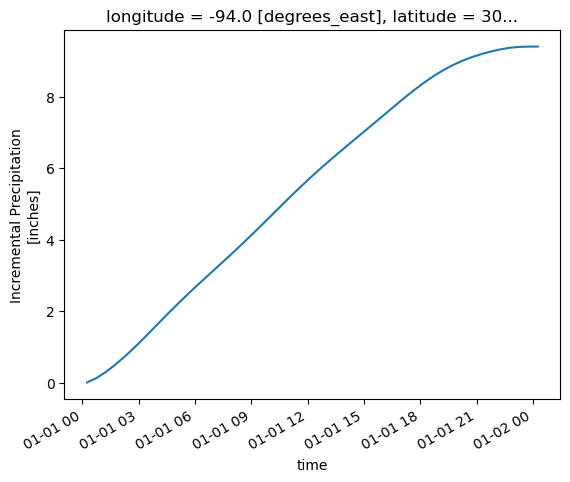

In [51]:
# ds['Precip'].cumsum().plot()
# ds['Precip'].sel(latitude=32, longitude=-90, method='nearest').cumsum().plot()
ds['Precip'].sel(latitude=30, longitude=-94, method='nearest').plot()

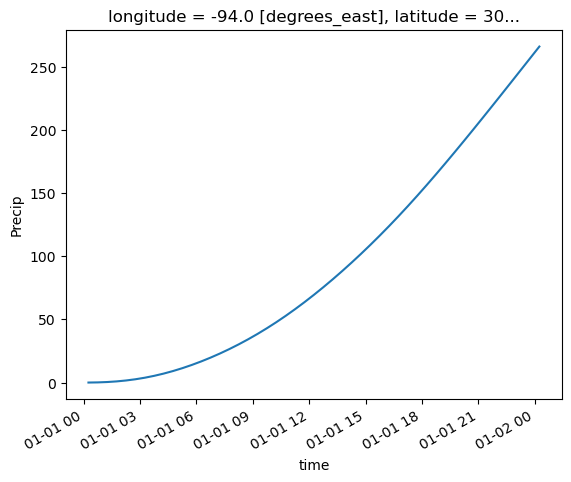

In [52]:
ds['Precip'].sel(latitude=30, longitude=-94, method='nearest').cumsum().plot()

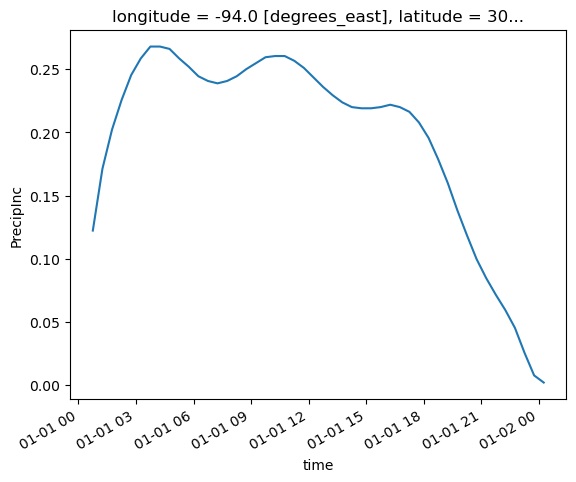

In [81]:
ds['PrecipInc'] = ds['Precip'].diff('time', label='upper')
ds['PrecipInc'].sel(latitude=30, longitude=-94, method='nearest').plot()

In [54]:
ds['Precip'].sel(latitude=30, longitude=-94, method='nearest').values

array([0.       , 0.122265 , 0.293436 , 0.4956435, 0.7213635, 0.966834 ,
       1.2254715, 1.493514 , 1.7615565, 2.027718 , 2.2863555, 2.5384095,
       2.7829395, 3.0237075, 3.2625945, 3.5033625, 3.7478925, 3.9980655,
       4.252941 , 4.512519 , 4.7730375, 5.033556 , 5.2903125, 5.541426 ,
       5.7850155, 6.021081 , 6.250563 , 6.474402 , 6.694479 , 6.9136155,
       7.132752 , 7.352829 , 7.574787 , 7.794864 , 8.011179 , 8.2190295,
       8.4146535, 8.5933485, 8.7532335, 8.891487 , 9.00999  , 9.109683 ,
       9.194328 , 9.265806 , 9.3250575, 9.3702015, 9.395595 , 9.403119 ,
       9.405    ])

In [55]:
ds['PrecipInc'].sel(latitude=30, longitude=-94, method='nearest').cumsum()

<xarray.DataArray 'PrecipInc' (time: 49)>
array([0.       , 0.122265 , 0.293436 , 0.4956435, 0.7213635, 0.966834 ,
       1.2254715, 1.493514 , 1.7615565, 2.027718 , 2.2863555, 2.5384095,
       2.7829395, 3.0237075, 3.2625945, 3.5033625, 3.7478925, 3.9980655,
       4.252941 , 4.512519 , 4.7730375, 5.033556 , 5.2903125, 5.541426 ,
       5.7850155, 6.021081 , 6.250563 , 6.474402 , 6.694479 , 6.9136155,
       7.132752 , 7.352829 , 7.574787 , 7.794864 , 8.011179 , 8.2190295,
       8.4146535, 8.5933485, 8.7532335, 8.891487 , 9.00999  , 9.109683 ,
       9.194328 , 9.265806 , 9.3250575, 9.3702015, 9.395595 , 9.403119 ,
       9.405    ])
Coordinates:
    longitude    float64 -94.0
    latitude     float64 30.0
  * time         (time) datetime64[ns] 1970-01-01T00:15:00 ... 1970-01-02T00:...
    spatial_ref  int32 ...

In [56]:
ds['PrecipInc'].sel(latitude=30, longitude=-94, method='nearest')

<xarray.DataArray 'PrecipInc' (time: 49)>
array([      nan, 0.122265 , 0.171171 , 0.2022075, 0.22572  , 0.2454705,
       0.2586375, 0.2680425, 0.2680425, 0.2661615, 0.2586375, 0.252054 ,
       0.24453  , 0.240768 , 0.238887 , 0.240768 , 0.24453  , 0.250173 ,
       0.2548755, 0.259578 , 0.2605185, 0.2605185, 0.2567565, 0.2511135,
       0.2435895, 0.2360655, 0.229482 , 0.223839 , 0.220077 , 0.2191365,
       0.2191365, 0.220077 , 0.221958 , 0.220077 , 0.216315 , 0.2078505,
       0.195624 , 0.178695 , 0.159885 , 0.1382535, 0.118503 , 0.099693 ,
       0.084645 , 0.071478 , 0.0592515, 0.045144 , 0.0253935, 0.007524 ,
       0.001881 ])
Coordinates:
    longitude    float64 -94.0
    latitude     float64 30.0
  * time         (time) datetime64[ns] 1970-01-01T00:15:00 ... 1970-01-02T00:...
    spatial_ref  int32 ...

In [57]:
from getTemporalTable import getTemporalTable


dist_table = getTemporalTable(r"data\Texas\tx_3_24h_temporal.csv", q_table='ALL', occurence='50%')
dist_table.head()

,hours,50%
0,0.0,0.00
1,0.5,1.30
2,1.0,3.12
3,1.5,5.27
4,2.0,7.67


In [78]:
da = dist_table.to_xarray()
da.expand_dims(dim="time")
da["time"] = ds.time
da['50%'] = da['50%'].swap_dims({"index":"time"})
da = da.drop_vars("hours")
da = da.drop_vars("index")
da = da.rename({"50%":"TemporalDistribution"})
ds = xr.merge([ds,da])
ds

<xarray.Dataset>
Dimensions:               (longitude: 1579, latitude: 1282, time: 49)
Coordinates:
  * longitude             (longitude) float64 -106.7 -106.6 ... -93.51 -93.5
  * latitude              (latitude) float64 36.51 36.5 36.49 ... 25.84 25.83
  * time                  (time) datetime64[ns] 1970-01-01T00:15:00 ... 1970-...
    spatial_ref           int32 0
Data variables:
    Precip                (time, latitude, longitude) float64 ...
    PrecipInc             (time, latitude, longitude) float64 nan nan ... nan
    TemporalDistribution  (time) float64 0.0 1.3 3.12 5.27 ... 99.9 99.98 100.0

In [59]:
import datetime
start_time = datetime.datetime.utcfromtimestamp(0) +  datetime.timedelta(hours=0.25)
for index, row in df_table.iterrows():
            timestep = start_time + datetime.timedelta(hours=row['hours'])


NameError: name 'df_table' is not defined

In [ ]:
ds['Precip_Inc'] = (ds['Precip'].diff().fillna(ds['Precip'], downcast='infer'))
ds